# Pandas for Time series data

#### CONTENT

1. [Load Data](#Load-data)
2. [Index Methods](#Pandas-index-methods)
3. [Data to time series](#Convert-year,-month-in-different-columns-into-timeseries)
4. [Sort time series](#Sort-by-time)
5. [Plot](#Plot)
6. [Other](#Other)

In [1]:
import pandas as pd
%matplotlib inline
pd.__version__

'0.17.1'

### Load data

The example file is in .xlsx Excel format, there are plently of builtin methods to load files in other format, simply use `pd.read_ + tab` to see other options

In [2]:
xlsx = pd.ExcelFile('ExampleData.xlsx')

#### Get all excel sheet names in a list

In [3]:
xlsx.sheet_names

['Data', 'Sheet1']

#### Read xlsx sheet into pandas dataframe

In [4]:
df = pd.read_excel(xlsx, sheetname='Data')

df.head(5) # Show first 5 rows of the dataframe

,BRAND,AREA,YEAR,MONTH,DEMAND
0,Brand_A,ASTRL,2016,1,21
1,Brand_A,ASTRL,2016,4,1666
2,Brand_A,ASTRL,2016,5,1296
3,Brand_A,ASTRL,2016,6,978
4,Brand_A,ASTRL,2016,7,872


### Pandas index methods

#### Basic index methods

In [5]:
df.ix[0,1] # By index numbers similar to matrix index

'ASTRL'

In [6]:
df.ix[0:4,:] # Range can be passed as well

,BRAND,AREA,YEAR,MONTH,DEMAND
0,Brand_A,ASTRL,2016,1,21
1,Brand_A,ASTRL,2016,4,1666
2,Brand_A,ASTRL,2016,5,1296
3,Brand_A,ASTRL,2016,6,978
4,Brand_A,ASTRL,2016,7,872


In [7]:
df['BRAND'].head(5) # Index by column name

0    Brand_A
1    Brand_A
2    Brand_A
3    Brand_A
4    Brand_A
Name: BRAND, dtype: object

#### Index with conditions

In [8]:
df.loc[df['DEMAND']==1296]

,BRAND,AREA,YEAR,MONTH,DEMAND
2,Brand_A,ASTRL,2016,5,1296
19,Brand_B VISTA,MEXICO,2015,2,1296


Use `&` in `df.loc[]` to check boolean for both True 

In [9]:
df.loc[(df['AREA']=='ASTRL') & (df['DEMAND'] > 500)] # Get all ASTRL data if demand is greater than 500

,BRAND,AREA,YEAR,MONTH,DEMAND
1,Brand_A,ASTRL,2016,4,1666
2,Brand_A,ASTRL,2016,5,1296
3,Brand_A,ASTRL,2016,6,978
4,Brand_A,ASTRL,2016,7,872
5,Brand_A,ASTRL,2016,8,746


Use `|` in `df.loc[]` to check boolean for any is True

In [10]:
# Get all data for Nov. or Dec. if demand is larger than 30000

df.loc[(df['DEMAND']>30000) & ((df['MONTH']==12) | (df['MONTH']==11))] 

,BRAND,AREA,YEAR,MONTH,DEMAND
65,Brand_B VISTA,MUESED,2015,11,110066
66,Brand_B VISTA,MUESED,2015,12,78656
87,Brand_B VISTA,NORAME,2015,11,45372
88,Brand_B VISTA,NORAME,2015,12,43946


Another convenient method for looking up strings in the dataframe is `df[].str.contains()`, this method will return a new dataframe of booleans for each row of the dataframe, simplely warp it with the original dataframe to get data contains a certian string.

In [11]:
df['BRAND'].str.contains("_B VISTA").head(5)

0    False
1    False
2    False
3    False
4    False
Name: BRAND, dtype: bool

In [12]:
df[df['BRAND'].str.contains("_B VISTA")].head(5)

,BRAND,AREA,YEAR,MONTH,DEMAND
8,Brand_B VISTA,LTFDUB,2015,4,255
9,Brand_B VISTA,LTFDUB,2015,7,112
10,Brand_B VISTA,MENA,2015,11,806
11,Brand_B VISTA,MENA,2015,12,276
12,Brand_B VISTA,MENA,2016,2,7833


### Convert year, month in different columns into timeseries

Simplely use `pd.to_datetime()` to convert year, month, date from string to datetime objects. Original year and month loaded form xlsx file are stored as `numpy.int64`, so we can easily convert them into string by using `df[].astype(str)`.

In [13]:
type(df['YEAR'][0])

numpy.int64

In [14]:
pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str)).head(5)

0   2016-01-01
1   2016-04-01
2   2016-05-01
3   2016-06-01
4   2016-07-01
dtype: datetime64[ns]

We can add converted datatime object and store them in the dataframe by creating a new column and pass the output of previous step to it.

In [16]:
df['TIME'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))

df.head(5)

,BRAND,AREA,YEAR,MONTH,DEMAND,TIME
0,Brand_A,ASTRL,2016,1,21,2016-01-01
1,Brand_A,ASTRL,2016,4,1666,2016-04-01
2,Brand_A,ASTRL,2016,5,1296,2016-05-01
3,Brand_A,ASTRL,2016,6,978,2016-06-01
4,Brand_A,ASTRL,2016,7,872,2016-07-01


### Sort by time

To sort data in time sequence, simplely use `df.sort_values()` to reorder the dataframe by column name. Below is an example of combining index methods with sort methods to get *Brand_A* in *ASTRL* in time order.

In [17]:
df_sorted = df.loc[(df['BRAND']=='Brand_A') & (df['AREA']=='ASTRL')].sort_values('TIME', ascending=True)

df_sorted

,BRAND,AREA,YEAR,MONTH,DEMAND,TIME
0,Brand_A,ASTRL,2016,1,21,2016-01-01
1,Brand_A,ASTRL,2016,4,1666,2016-04-01
2,Brand_A,ASTRL,2016,5,1296,2016-05-01
3,Brand_A,ASTRL,2016,6,978,2016-06-01
4,Brand_A,ASTRL,2016,7,872,2016-07-01
5,Brand_A,ASTRL,2016,8,746,2016-08-01


### Plot

Pandas has matplotlab built in, simplely use `df.plot()` to visualize data. 

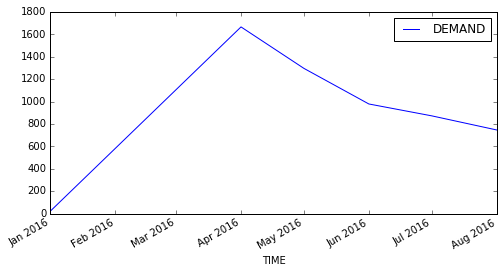

In [18]:
df_sorted.plot(x='TIME', y='DEMAND',figsize=(8,4))

### Other

#### Dataframe stores python objects

Pandas dataframe can store python objects as well, which can be convenient for further usage. 

In [19]:
data = [[[1,2,3]],
        [[1,2,3]]]

In [20]:
df_obj = pd.DataFrame(data=data,columns=['List Object'])
df_obj

,List Object
0,"[1, 2, 3]"
1,"[1, 2, 3]"


In [21]:
type(df_obj.ix[0,0])

list